In [43]:
#ALGEBRA AND DATA MANIPULATION
import numpy as np 
import pandas as pd 
#VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt
#MODELING
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import clone
import optuna
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

import phik
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore') 


/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
train = pd.read_csv(r"/kaggle/input/playground-series-s4e2/train.csv")
test = pd.read_csv(r"/kaggle/input/playground-series-s4e2/test.csv")
ss = pd.read_csv(r"/kaggle/input/playground-series-s4e2/sample_submission.csv")
train.drop("id", axis=1, inplace=True)
test.drop("id", axis=1, inplace=True)

# **QUICK OVERVIEW**

**Feature Descriptions:**
id: Unique identifier for each individual.

Gender: Gender of the individual (Male/Female).

Age: Age of the individual.

Height: Height of the individual in meters.

Weight: Weight of the individual in kilograms.

family_history_with_overweight: Whether the individual has a family history of overweight (yes/no).

FAVC: Frequency of consuming high-caloric food (categorical: yes/no).

FCVC: Frequency of consuming vegetables (numeric).

NCP: Number of main meals per day (numeric).

CAEC: Consumption of food between meals (categorical: no/sometimes/frequently/always).

SMOKE: Whether the individual smokes (yes/no).

CH2O: Daily water consumption in liters (numeric).

SCC: Calories consumption monitoring (categorical: no/sometimes/frequently/always).

FAF: Physical activity frequency (numeric).

TUE: Time using technology devices (numeric).

CALC: Consumption of alcohol (categorical: no/sometimes/frequently/always).

MTRANS: Mode of transportation (categorical: automobile/bike/motorbike/public transportation/walking).

NObeyesdad: Obesity level classification (target variable).

Note: The target variable is "NObeyesdad," representing the obesity level of the individual, categorized into different levels such as Normal_Weight, Overweight_Level_II, Insufficient_Weight, Obesity_Type_III, etc.

In [3]:
#CHECKING NULL VALUES
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [4]:
train.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
train.head().T

,0,1,2,3,4
Gender,Male,Female,Female,Female,Male
Age,24.443011,18.0,18.0,20.952737,31.641081
Height,1.699998,1.56,1.71146,1.71073,1.914186
Weight,81.66995,57.0,50.165754,131.274851,93.798055
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.0,2.0,1.880534,3.0,2.679664
NCP,2.983297,3.0,1.411685,3.0,1.971472
CAEC,Sometimes,Frequently,Sometimes,Sometimes,Sometimes
SMOKE,no,no,no,no,no


In [6]:
cat_cols=train.select_dtypes("object").columns
num_cols=train.select_dtypes("float").columns

In [7]:
#CHECKING THE NUMBER OF CATEGORIES IN EACH CATEGORICAL VARIABLE
for cat in cat_cols:
    num_uni=train[cat].nunique()
    print(f"column: {cat}, has {num_uni} unique values")

column: Gender, has 2 unique values
column: family_history_with_overweight, has 2 unique values
column: FAVC, has 2 unique values
column: CAEC, has 4 unique values
column: SMOKE, has 2 unique values
column: SCC, has 2 unique values
column: CALC, has 3 unique values
column: MTRANS, has 5 unique values
column: NObeyesdad, has 7 unique values


# **EXPLORATORY DATA ANALYSIS**

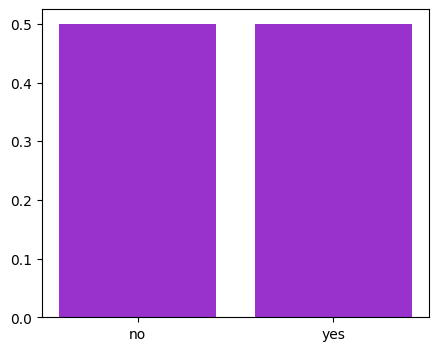

In [8]:
plt.figure(figsize=(5,4))
plt.bar(train["SMOKE"], 0.5, color="darkorchid")
plt.show()

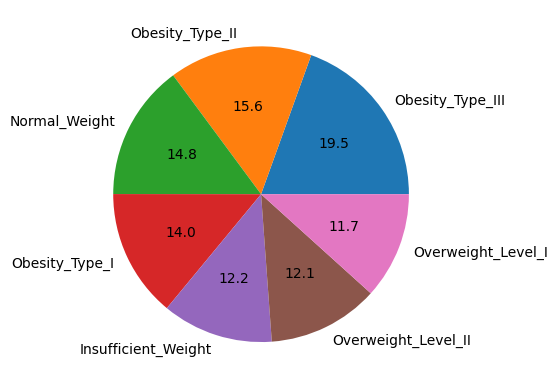

In [9]:
#PIE CHART FOR THE TARGET VARIABLE
fig, ax = plt.subplots()
ax.pie(train["NObeyesdad"].value_counts(), labels= train["NObeyesdad"].value_counts().index,autopct="%.1f")
plt.show()

<Figure size 500x400 with 0 Axes>

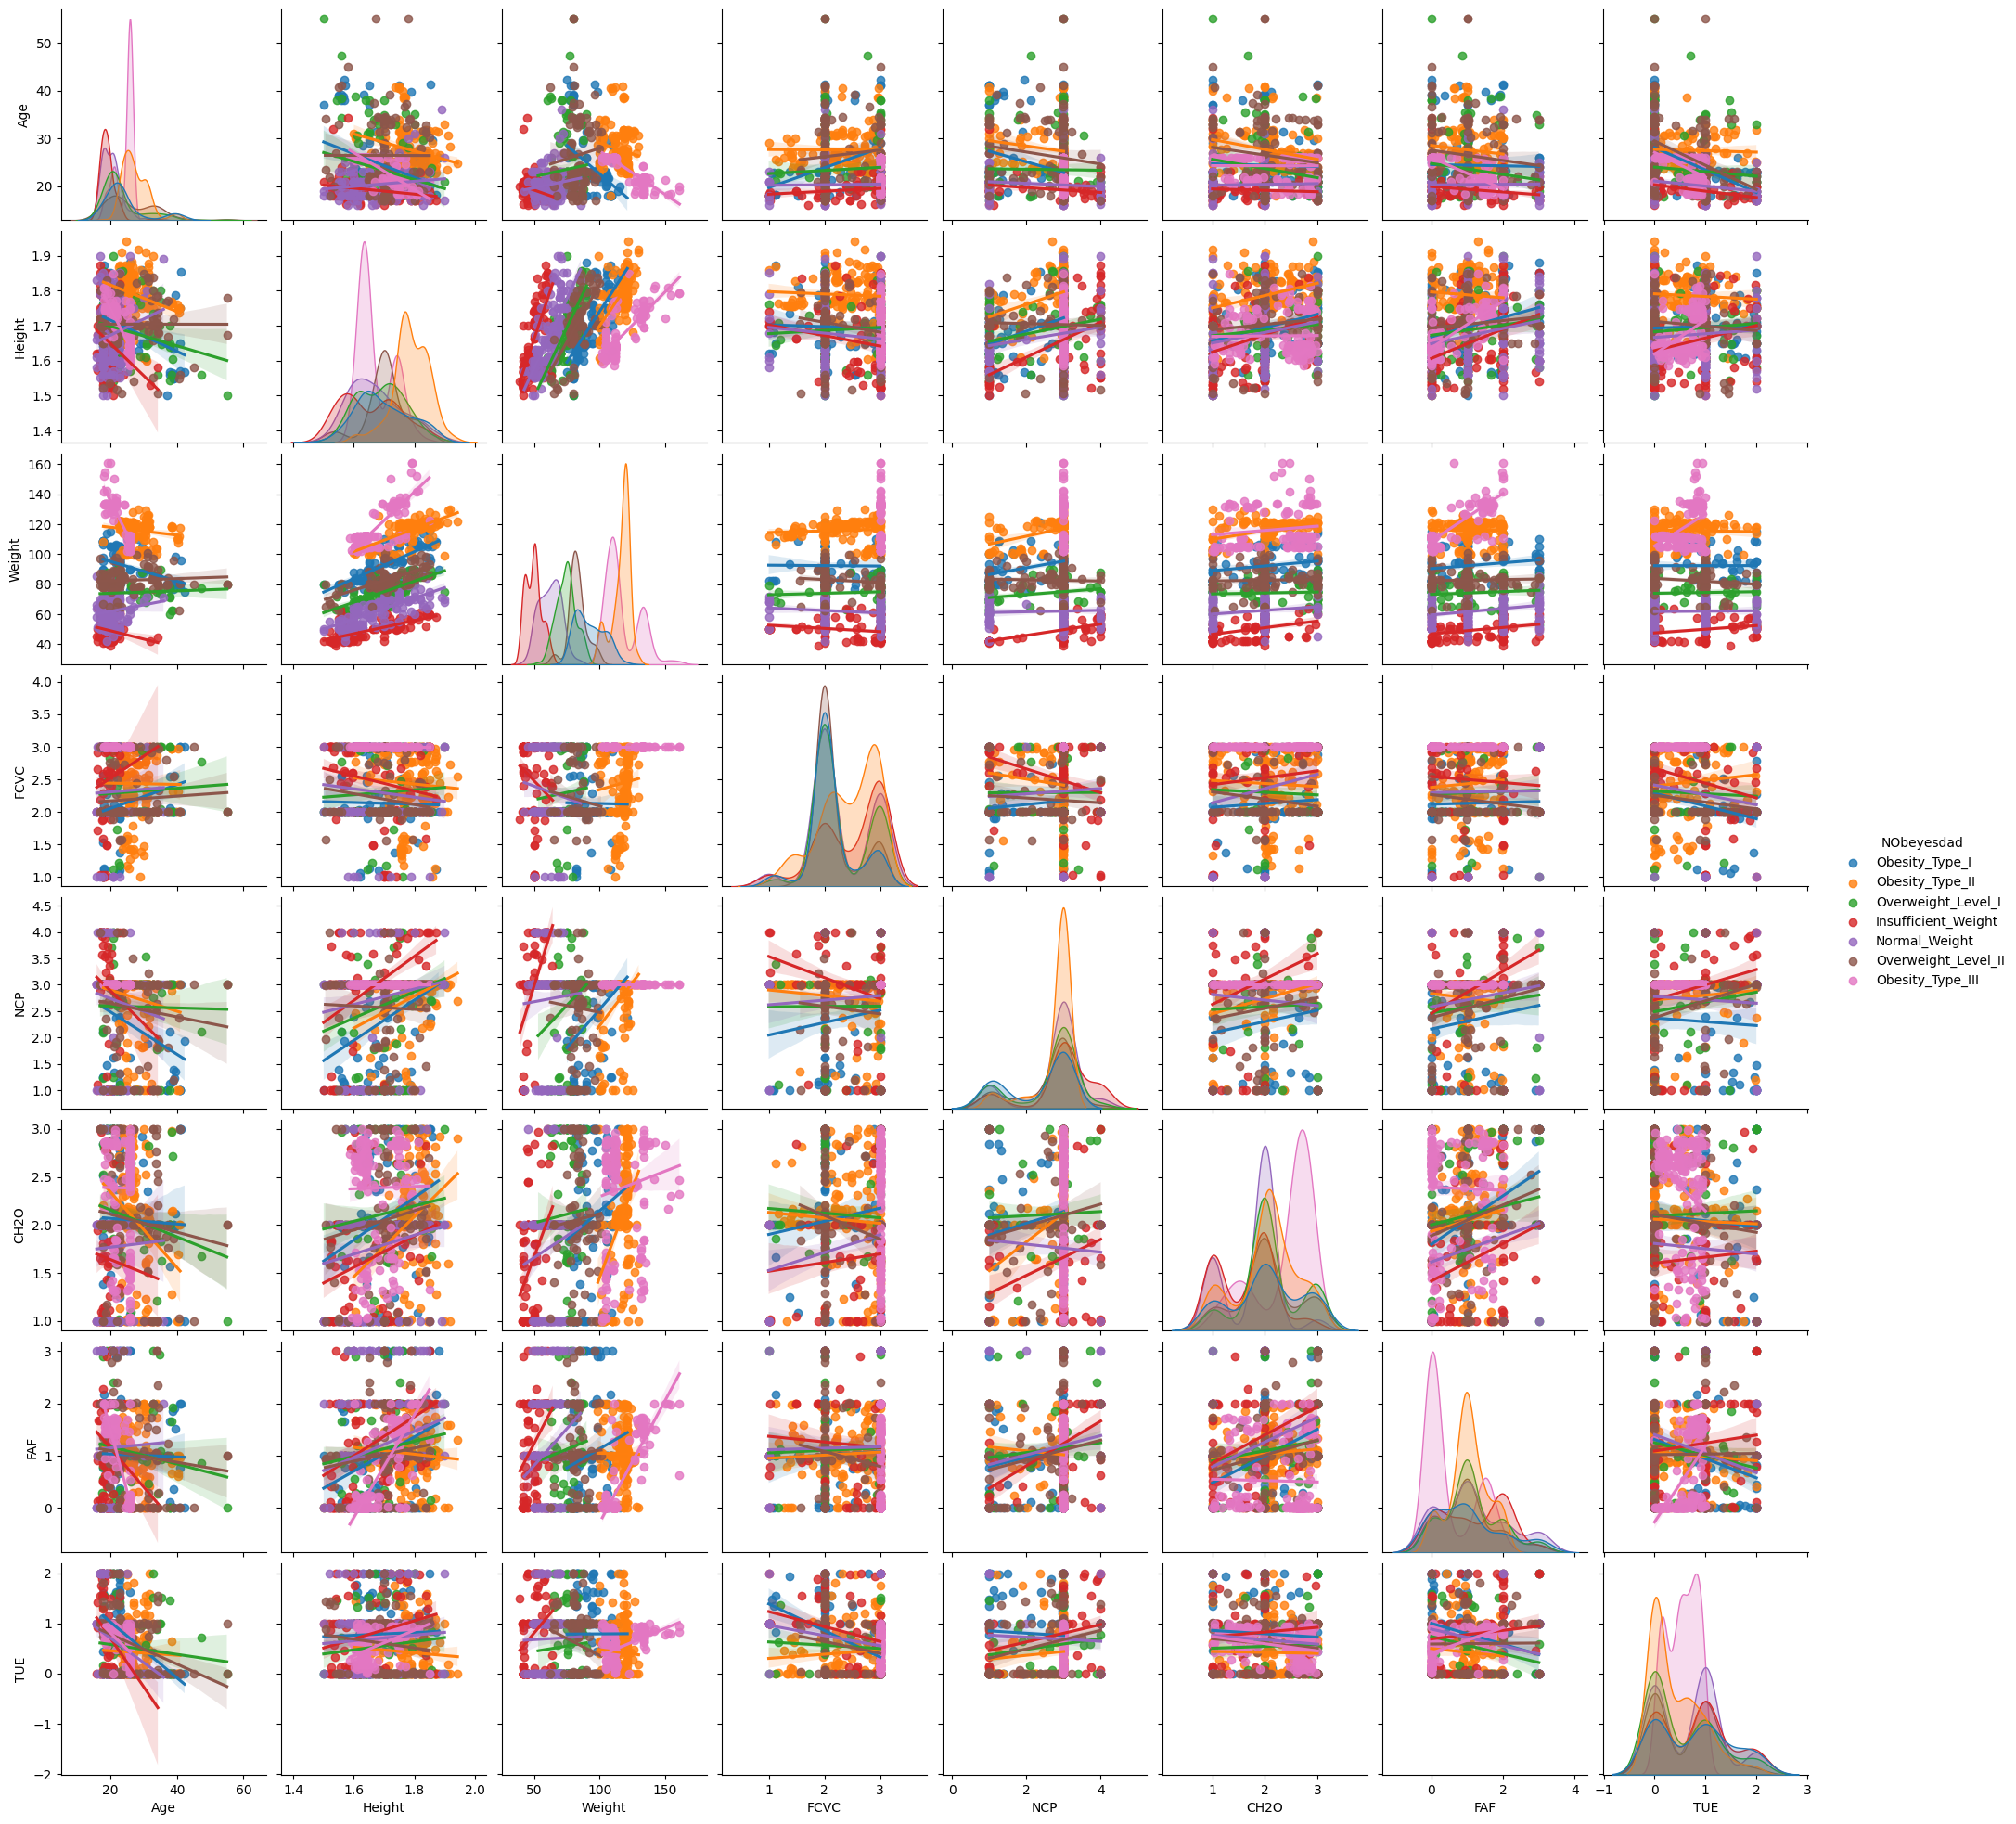

In [10]:
plt.figure(figsize=(5,4))
sns.pairplot(train.sample(1000), kind="reg", hue='NObeyesdad')
plt.show()

interval columns not set, guessing: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


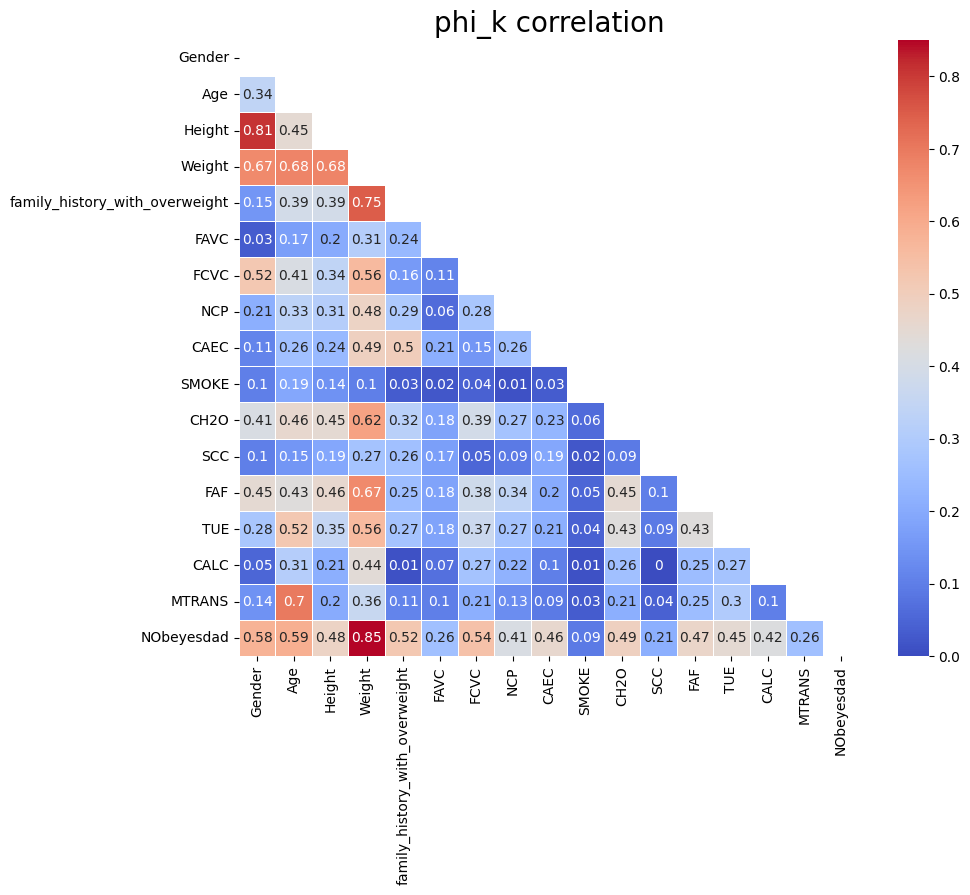

In [11]:
train_corr_phi_k = train.phik_matrix().round(2)
mask=np.zeros_like(train_corr_phi_k)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(10, 8))
sns.heatmap(train_corr_phi_k, mask=mask, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('phi_k correlation', fontsize=20)
plt.show()

# **BASELINE MODEL**

In [12]:
train1=train.copy()
train1[cat_cols]=train1[cat_cols].apply(LabelEncoder().fit_transform)

In [105]:
X=train1.drop(["NObeyesdad"], axis=1)
y=train1["NObeyesdad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


clf=XGBClassifier(objective="multi:softprob", learning_rate=0.01, evaluation_metric="auc")
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8847784200385357


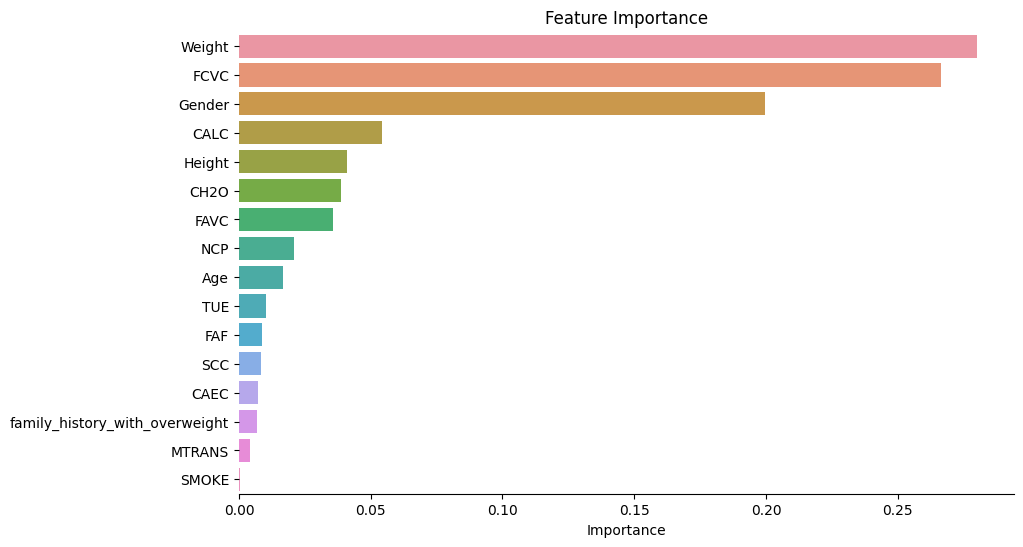

In [106]:
# feature importances
feature_importance = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=False)
plt.show()

# FEATURE ENGINEERING AND PREPROCESSING

In [15]:
def encoding(data):
    cat_cols=data.select_dtypes("object").columns
    data[cat_cols]=data[cat_cols].apply(LabelEncoder().fit_transform)
    return data

label_encoder=LabelEncoder()
cat_cols=train.select_dtypes("object").columns
train[cat_cols]=train[cat_cols].apply(label_encoder.fit_transform)

In [16]:
def feature_engineering(data):
    # Body Mass Index (BMI) - a common health indicator
    data['BMI'] = data['Weight'] / (data['Height'] / 100) ** 2

    # Total calorie intake based on different factors
    #data['Total_Caloric_Intake'] = data['FCVC'] + data['CAEC'] + data['SCC'] + data['CALC']

    # Active lifestyle indicator based on physical activity and meal frequency
    #data['Active_Lifestyle'] = data['FAF'] * data['NCP']

    # Technology usage impact on health
    #data['Tech_Health_Impact'] = data['TUE'] * data['SMOKE']

    # Interaction between age and family history
    data['Age_Family_History'] = data['Age'] * data['family_history_with_overweight']

    # Interaction between gender and alcohol consumption
    data['Gender_Alcohol'] = data['Gender'] * data['CALC']

    # Interaction between transportation and physical activity
    #data['Transportation_Activity'] = data['MTRANS'] * data['FAF']

    return data
train=feature_engineering(train)

In [54]:
cat_cols_test=test.select_dtypes("object").columns
test[cat_cols_test]=test[cat_cols_test].apply(LabelEncoder().fit_transform)
test=feature_engineering(test)

# **MODELING**

In [88]:
#FUNCTION TO PERFORM CV
def cross_val_model(estimators, tr, test_size=0.2, random_state=42, verbose=True):
    '''
        estimators : pipeline consists preprocessing, encoder & model
        test_size : proportion of the dataset to include in the test split
        random_state : controls the randomness of the training and testing indices
        verbose : print train/valid score (yes/no)
    '''
    train = tr.copy()
    X = train.drop(["NObeyesdad"], axis=1)
    y = train["NObeyesdad"]

    test_predictions = np.zeros((len(test), 7))
    valid_predictions = np.zeros((len(X), 7))

    val_scores, train_scores = [], []
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=random_state)

    model = clone(estimators)
    model.fit(X_train, y_train)

    if verbose:
        print("-" * 100)
        print(f"Train Accuracy Score: {accuracy_score(y_train, model.predict(X_train))}")
        print(f"Valid Accuracy Score: {accuracy_score(y_valid, model.predict(X_valid))}")
        print("-" * 100)

    test_predictions = model.predict_proba(test)
    valid_predictions = model.predict_proba(X_valid)
    val_scores.append(accuracy_score(y_valid, model.predict(X_valid)))

    if verbose:
        print(f"Average Mean Accuracy Score: {np.array(val_scores).mean()}")
    
    return val_scores, valid_predictions, test_predictions

In [89]:
# Empty dataframe to store score, & train / test predictions.
score_list, oof_list, predict_list = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

# **LGBM CLASSIFIER**

# HYPERPARAMETER OPTIMIZATION

In [ ]:
# #The tuning process has been commented out due to its time-consuming nature.

# # Define the objective function for Optuna optimization
# def objective(trial, X_train, y_train, X_test, y_test):
#     # Define parameters to be optimized for the LGBMClassifier
#     param = {
#         "objective": "multiclass",
#         "metric": "multi_logloss",
#         "verbosity": -1,
#         "boosting_type": "gbdt",
#         "random_state": 42,
#         "num_class": 7,
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.05),
#         "n_estimators": trial.suggest_int("n_estimators", 400, 600),
#         "lambda_l1": trial.suggest_float("lambda_l1", 0.005, 0.015),
#         "lambda_l2": trial.suggest_float("lambda_l2", 0.02, 0.06),
#         "max_depth": trial.suggest_int("max_depth", 6, 14),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
#         "subsample": trial.suggest_float("subsample", 0.8, 1.0),
#         "min_child_samples": trial.suggest_int("min_child_samples", 10, 50),
#     }

#     # Create an instance of LGBMClassifier with the suggested parameters
#     lgbm_classifier = LGBMClassifier(**param)
    
#     # Fit the classifier on the training data
#     lgbm_classifier.fit(X_train, y_train)

#     # Evaluate the classifier on the test data
#     score = lgbm_classifier.score(X_test, y_test)

#     return score

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust the test_size as needed

# # Set up the sampler for Optuna optimization
# sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# # Create a study object for Optuna optimization
# study = optuna.create_study(direction="maximize", sampler=sampler)

# # Run the optimization process
# study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=100)

# # Get the best parameters after optimization
# best_params = study.best_params

# print('='*50)
# print(best_params)

In [90]:
best_params = {
    "objective": "multiclass",          # Objective function for the model
    "metric": "multi_logloss",          # Evaluation metric
    "verbosity": -1,                    # Verbosity level (-1 for silent)
    "boosting_type": "gbdt",            # Gradient boosting type
    "random_state": 42,       # Random state for reproducibility
    "num_class": 7,                     # Number of classes in the dataset
    'learning_rate': 0.030962211546832760,  # Learning rate for gradient boosting
    'n_estimators': 500,                # Number of boosting iterations
    'lambda_l1': 0.009667446568254372,  # L1 regularization term
    'lambda_l2': 0.04018641437301800,   # L2 regularization term
    'max_depth': 10,                    # Maximum depth of the trees
    'colsample_bytree': 0.40977129346872643,  # Fraction of features to consider for each tree
    'subsample': 0.9535797422450176,    # Fraction of samples to consider for each boosting iteration
    'min_child_samples': 26             # Minimum number of data needed in a leaf
}

In [91]:
#PIPELINE WITH STANDARD SCALER
lgbm = make_pipeline(    
                        StandardScaler(),
                        LGBMClassifier(**best_params,verbose=-1)
                    )

In [92]:
#TO ENCODE THE TARGET VARIABLE
target_mapping = {
                  'Insufficient_Weight':0,
                  'Normal_Weight':1,
                  'Overweight_Level_I':2,
                  'Overweight_Level_II':3, 
                  'Obesity_Type_I':4,
                  'Obesity_Type_II':5 ,
                  'Obesity_Type_III':6
                  }


In [93]:
val_scores,val_predictions,test_predictions = cross_val_model(lgbm, train)

for k,v in target_mapping.items():
    oof_list[f"lgbm_{k}"] = val_predictions[:,v]
    
for k,v in target_mapping.items():
    predict_list[f"lgbm_{k}"] = test_predictions[:,v]

----------------------------------------------------------------------------------------------------
Train Accuracy Score: 0.987715283632422
Valid Accuracy Score: 0.9087186897880539
----------------------------------------------------------------------------------------------------
Average Mean Accuracy Score: 0.9087186897880539


# **XGB CLASSIFIER**

# XGB HYPERPARAMETER OPTIMIZATION - OPTUNA

In [94]:
# Optuna study for XGB Model
def xgb_objective(trial):
    params = {
        'grow_policy': trial.suggest_categorical('grow_policy', ["depthwise", "lossguide"]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'gamma' : trial.suggest_float('gamma', 1e-9, 1.0),
        'subsample': trial.suggest_float('subsample', 0.25, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.25, 1.0),
        'max_depth': trial.suggest_int('max_depth', 0, 24),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 30),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
    }

    params['booster'] = 'gbtree'
    params['objective'] = 'multi:softmax'
    params["device"] = "cuda"
    params["verbosity"] = 0
    params['tree_method'] = "gpu_hist"
    
    
    optuna_model = make_pipeline(
#                     ExtractFeatures,
                    MEstimateEncoder(cols=['Gender','family_history_with_overweight','FAVC','CAEC',
                                           'SMOKE','SCC','CALC','MTRANS']),
                    XGBClassifier(**params,seed=RANDOM_SEED)
                   )
    
    val_scores, _, _ = cross_val_model(optuna_model,verbose = False)
    return np.array(val_scores).mean()

#xgb_study = optuna.create_study(direction = 'maximize')
#xgb_study.optimize(xgb_objective, 50)

In [95]:
best_params_xgb = {'grow_policy': 'depthwise', 'n_estimators': 982, 
               'learning_rate': 0.050053726931263504, 'gamma': 0.5354391952653927, 
               'subsample': 0.7060590452456204, 'colsample_bytree': 0.37939433412123275, 
               'max_depth': 23, 'min_child_weight': 21, 'reg_lambda': 9.150224029846654e-08,
               'reg_alpha': 5.671063656994295e-08}

In [96]:
xgb = make_pipeline(    
                        StandardScaler(),
                        XGBClassifier(**best_params_xgb,seed=42)
                    )

In [97]:
val_scores,val_predictions,test_predictions = cross_val_model(xgb, train)

for k,v in target_mapping.items():
    oof_list[f"xgb_{k}"] = val_predictions[:,v]

for k,v in target_mapping.items():
    predict_list[f"xgb_{k}"] = test_predictions[:,v]

----------------------------------------------------------------------------------------------------
Train Accuracy Score: 0.9482114898229556
Valid Accuracy Score: 0.9082369942196532
----------------------------------------------------------------------------------------------------
Average Mean Accuracy Score: 0.9082369942196532


# WEIGHTED COMBINATION OF PREDICTIONS

In [98]:
weights = {"lgbm_":3,
           "xgb_":1,}

tmp = oof_list.copy()
for k,v in target_mapping.items():
    tmp[f"{k}"] = (weights['lgbm_']*tmp[f"lgbm_{k}"]+
                   weights['xgb_']*tmp[f"xgb_{k}"])    
tmp['pred'] = tmp[target_mapping.keys()].idxmax(axis = 1)
tmp['label'] = train["NObeyesdad"]
#print(f"Ensemble Accuracy Score: {accuracy_score(train['NObeyesdad'],tmp['pred'])}")


In [102]:
for k,v in target_mapping.items():
    predict_list[f"{k}"] = (weights['lgbm_']*predict_list[f"lgbm_{k}"]+
                            weights['xgb_']*predict_list[f"xgb_{k}"])

final_pred = predict_list[target_mapping.keys()].idxmax(axis = 1)


# SUBMISSION

In [103]:
ss["NObeyesdad"] = final_pred
ss.to_csv("submission.csv",index=False)
ss

,id,NObeyesdad
0,20758,Overweight_Level_II
1,20759,Obesity_Type_II
2,20760,Obesity_Type_I
3,20761,Overweight_Level_I
4,20762,Obesity_Type_I
...,...,...
13835,34593,Obesity_Type_III
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight
